# MLOPS PROJECT - AML DATA UNDERSTANDING

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('HI-Small_Trans.csv')

In [13]:
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


In [11]:
df.describe(include='all')

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
count,5078345,5.078345e+06,5078345,5.078345e+06,5078345,5.078345e+06,5078345,5.078345e+06,5078345,5078345,5.078345e+06
unique,15018,NaN,496995,NaN,420636,NaN,15,NaN,15,7,NaN
top,2022/09/01 00:04,NaN,100428660,NaN,100428660,NaN,US Dollar,NaN,US Dollar,Cheque,NaN
freq,11193,NaN,168672,NaN,1084,NaN,1879341,NaN,1895172,1864331,NaN
mean,NaN,4.573057e+04,NaN,6.574456e+04,NaN,5.988726e+06,NaN,4.509273e+06,NaN,NaN,1.019427e-03
std,NaN,8.176562e+04,NaN,8.409299e+04,NaN,1.037183e+09,NaN,8.697728e+08,NaN,NaN,3.191219e-02
min,NaN,1.000000e+00,NaN,1.000000e+00,NaN,1.000000e-06,NaN,1.000000e-06,NaN,NaN,0.000000e+00
25%,NaN,1.190000e+02,NaN,4.259000e+03,NaN,1.833700e+02,NaN,1.844800e+02,NaN,NaN,0.000000e+00
50%,NaN,9.679000e+03,NaN,2.156800e+04,NaN,1.411010e+03,NaN,1.414540e+03,NaN,NaN,0.000000e+00
75%,NaN,2.862800e+04,NaN,1.223320e+05,NaN,1.234627e+04,NaN,1.229784e+04,NaN,NaN,0.000000e+00


In [8]:
df['Is Laundering'].value_counts()

0    5073168
1       5177
Name: Is Laundering, dtype: int64

In [66]:
len(df[df['Is Laundering'] == 1]) / len(df) * 100

0.10194266045335636

In [12]:
df.isna().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

In [22]:
print("Number of unique from banks: ", df['From Bank'].nunique())
print("Number of unique to banks: ", df['To Bank'].nunique())

Number of unique from banks:  30470
Number of unique to banks:  15811


In [23]:
print("Number of unique from accounts: ", df['Account'].nunique())
print("Number of unique to accounts: ", df['Account.1'].nunique())

Number of unique from accounts:  496995
Number of unique to accounts:  420636


In [25]:
df['Payment Format'].value_counts()

Cheque          1864331
Credit Card     1323324
ACH              600797
Cash             490891
Reinvestment     481056
Wire             171855
Bitcoin          146091
Name: Payment Format, dtype: int64

In [31]:
print("Payment Currency value counts: \n", df['Payment Currency'].value_counts())
print("Receiving Currency value counts: \n", df['Receiving Currency'].value_counts())

Payment Currency value counts: 
 US Dollar            1895172
Euro                 1168297
Swiss Franc           234860
Yuan                  213752
Shekel                192184
Rupee                 190202
UK Pound              180738
Yen                   155209
Ruble                 155178
Bitcoin               146066
Canadian Dollar       140042
Australian Dollar     136769
Mexican Peso          110159
Saudi Riyal            89014
Brazil Real            70703
Name: Payment Currency, dtype: int64
Receiving Currency value counts: 
 US Dollar            1879341
Euro                 1172017
Swiss Franc           237884
Yuan                  206551
Shekel                194988
Rupee                 192065
UK Pound              181255
Ruble                 157361
Yen                   156319
Bitcoin               148151
Canadian Dollar       141357
Australian Dollar     138511
Mexican Peso          111030
Saudi Riyal            89971
Brazil Real            71544
Name: Receiving Currency,

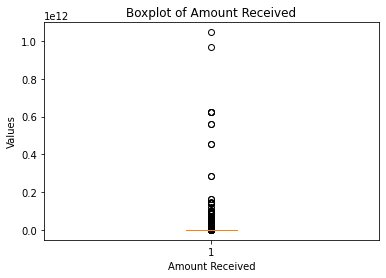

Amount Received min:  1e-06
Amount Received max:  1046302363293.48
Amount Received median:  1411.01
Amount Received mean:  5988726.070072798
Q1 =  183.37
Q3 =  12346.27


In [46]:
# Create a boxplot of column 'A'
plt.boxplot(df['Amount Received'])

# Add title and labels
plt.title('Boxplot of Amount Received')
plt.xlabel('Amount Received')
plt.ylabel('Values')

# Display the plot
plt.show()

print("Amount Received min: ", df['Amount Received'].min())
print("Amount Received max: ", df['Amount Received'].max())
print("Amount Received median: ", df['Amount Received'].median())
print("Amount Received mean: ", df['Amount Received'].mean())

# Calculate first quartile (Q1) and third quartile (Q3)
print("Q1 = ", df['Amount Received'].quantile(0.25))
print("Q3 = ", df['Amount Received'].quantile(0.75))

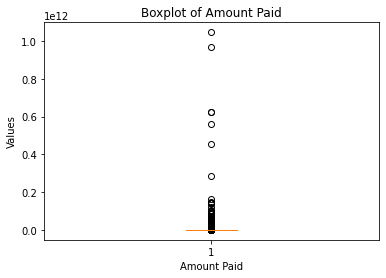

Amount Paid min:  1e-06
Amount Paid max:  1046302363293.48
Amount Paid median:  1414.54
Amount Paid mean:  4509273.3677414
Q1 =  184.48
Q3 =  12297.84


In [47]:
# Create a boxplot of column 'A'
plt.boxplot(df['Amount Paid'])

# Add title and labels
plt.title('Boxplot of Amount Paid')
plt.xlabel('Amount Paid')
plt.ylabel('Values')

# Display the plot
plt.show()

print("Amount Paid min: ", df['Amount Paid'].min())
print("Amount Paid max: ", df['Amount Paid'].max())
print("Amount Paid median: ", df['Amount Paid'].median())
print("Amount Paid mean: ", df['Amount Paid'].mean())

# Calculate first quartile (Q1) and third quartile (Q3)
print("Q1 = ", df['Amount Paid'].quantile(0.25))
print("Q3 = ", df['Amount Paid'].quantile(0.75))

In [54]:
# Filter the DataFrame where 'is laundering' equals 1
laundering_df = df[df['Is Laundering'] == 1]
not_laundering_df = df[df['Is Laundering'] == 0]

laundering_df['Payment Format'].value_counts()


ACH            4483
Cheque          324
Credit Card     206
Cash            108
Bitcoin          56
Name: Payment Format, dtype: int64

In [50]:
laundering_df['Payment Currency'].value_counts()


US Dollar            1912
Euro                 1372
Saudi Riyal           374
Swiss Franc           193
Yuan                  184
Rupee                 167
Yen                   155
Ruble                 133
UK Pound              132
Canadian Dollar       128
Australian Dollar     127
Shekel                 95
Mexican Peso           92
Brazil Real            57
Bitcoin                56
Name: Payment Currency, dtype: int64

In [51]:
laundering_df['Receiving Currency'].value_counts()


US Dollar            1912
Euro                 1372
Saudi Riyal           374
Swiss Franc           193
Yuan                  184
Rupee                 167
Yen                   155
Ruble                 133
UK Pound              132
Canadian Dollar       128
Australian Dollar     127
Shekel                 95
Mexican Peso           92
Brazil Real            57
Bitcoin                56
Name: Receiving Currency, dtype: int64

In [53]:
print("Amount Paid min in laundering transactions: ", laundering_df['Amount Paid'].min())
print("Amount Paid max in laundering transactions: ", laundering_df['Amount Paid'].max())
print("Amount Paid mean in laundering transactions: ", laundering_df['Amount Paid'].mean())
print("Amount Paid median in laundering transactions: ", laundering_df['Amount Paid'].median())


Amount Paid min in laundering transactions:  0.003227
Amount Paid max in laundering transactions:  84853144179.58
Amount Paid mean in laundering transactions:  36135310.41281265
Amount Paid median in laundering transactions:  8667.21


In [55]:
print("Amount Paid min in not laundering transactions: ", not_laundering_df['Amount Paid'].min())
print("Amount Paid max in not laundering transactions: ", not_laundering_df['Amount Paid'].max())
print("Amount Paid mean in not laundering transactions: ", not_laundering_df['Amount Paid'].mean())
print("Amount Paid median in not laundering transactions: ", not_laundering_df['Amount Paid'].median())


Amount Paid min in not laundering transactions:  1e-06
Amount Paid max in not laundering transactions:  1046302363293.48
Amount Paid mean in not laundering transactions:  4477000.043896748
Amount Paid median in not laundering transactions:  1410.99


In [56]:
print("Amount Received min in laundering transactions: ", laundering_df['Amount Received'].min())
print("Amount Received max in laundering transactions: ", laundering_df['Amount Received'].max())
print("Amount Received mean in laundering transactions: ", laundering_df['Amount Received'].mean())
print("Amount Received median in laundering transactions: ", laundering_df['Amount Received'].median())


Amount Received min in laundering transactions:  0.003227
Amount Received max in laundering transactions:  84853144179.58
Amount Received mean in laundering transactions:  36135310.41281265
Amount Received median in laundering transactions:  8667.21


In [60]:
laundering_df[laundering_df['Amount Received'] == 84853144179.58]

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
557728,2022/09/01 07:25,4,806B9AF90,116781,806B9B6A0,8.485314e+10,Ruble,8.485314e+10,Ruble,ACH,1


In [57]:
print("Amount Received min in not laundering transactions: ", not_laundering_df['Amount Received'].min())
print("Amount Received max in not laundering transactions: ", not_laundering_df['Amount Received'].max())
print("Amount Received mean in not laundering transactions: ", not_laundering_df['Amount Received'].mean())
print("Amount Received median in not laundering transactions: ", not_laundering_df['Amount Received'].median())


Amount Received min in not laundering transactions:  1e-06
Amount Received max in not laundering transactions:  1046302363293.48
Amount Received mean in not laundering transactions:  5957962.478734538
Amount Received median in not laundering transactions:  1407.51


In [59]:
not_laundering_df[not_laundering_df['Amount Received'] == 1046302363293.48]

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
3130043,2022/09/06 17:49,19925,803D95360,210185,803DA4620,1.046302e+12,Yen,1.046302e+12,Yen,ACH,0


In [61]:
# Calculate value counts of 'Receiving Currency' for each DataFrame
laundering_value_counts = laundering_df['Receiving Currency'].value_counts()
df_value_counts = df['Receiving Currency'].value_counts()

# Perform element-wise division
percent_laundering_currency = laundering_value_counts / df_value_counts

print("Division result:")
print(percent_laundering_currency)

Division result:
Australian Dollar    0.000917
Bitcoin              0.000378
Brazil Real          0.000797
Canadian Dollar      0.000906
Euro                 0.001171
Mexican Peso         0.000829
Ruble                0.000845
Rupee                0.000869
Saudi Riyal          0.004157
Shekel               0.000487
Swiss Franc          0.000811
UK Pound             0.000728
US Dollar            0.001017
Yen                  0.000992
Yuan                 0.000891
Name: Receiving Currency, dtype: float64


In [62]:
# Calculate value counts of 'Receiving Currency' for each DataFrame
laundering_value_counts = laundering_df['Payment Currency'].value_counts()
df_value_counts = df['Payment Currency'].value_counts()

# Perform element-wise division
percent_laundering_currency = laundering_value_counts / df_value_counts

print("Division result:")
print(percent_laundering_currency)

Division result:
Australian Dollar    0.000929
Bitcoin              0.000383
Brazil Real          0.000806
Canadian Dollar      0.000914
Euro                 0.001174
Mexican Peso         0.000835
Ruble                0.000857
Rupee                0.000878
Saudi Riyal          0.004202
Shekel               0.000494
Swiss Franc          0.000822
UK Pound             0.000730
US Dollar            0.001009
Yen                  0.000999
Yuan                 0.000861
Name: Payment Currency, dtype: float64


In [71]:
# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract the year from the 'Timestamp' column
df['Timestamp'].dt.year.value_counts()


2022    5078345
Name: Timestamp, dtype: int64

In [72]:
df['Timestamp'].dt.month.value_counts()


9    5078345
Name: Timestamp, dtype: int64

In [73]:
df['Timestamp'].dt.day.value_counts()


1     1114921
2      754449
9      654467
8      482773
7      482751
5      482650
6      482089
10     208325
4      207430
3      207382
11        396
12        281
13        184
14        121
15         46
16         46
17         23
18         11
Name: Timestamp, dtype: int64

In [75]:
# Convert the 'Timestamp' column to datetime format
laundering_df['Timestamp'] = pd.to_datetime(laundering_df['Timestamp'])

# Extract the year from the 'Timestamp' column
laundering_df['Timestamp'].dt.day.value_counts()

<ipython-input-75-ffd05ad22730>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laundering_df['Timestamp'] = pd.to_datetime(laundering_df['Timestamp'])


8     539
6     531
9     514
7     497
5     471
10    442
2     408
4     407
3     391
1     322
11    232
12    170
13    106
14     70
15     28
16     26
17     15
18      8
Name: Timestamp, dtype: int64